In [133]:
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('spam.csv')

In [135]:
df.shape

(5559, 2)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [137]:
df.sample(5)

,type,text
344,ham,"Yo, call me when you get the chance, a friend ..."
5057,ham,"Just wondering, the others just took off"
3970,ham,"Gosh that , what a pain. Spose I better come t..."
2571,ham,But if she.s drinkin i'm ok.
2584,ham,Whos this am in class:-)


In [138]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [139]:
df['type'] = encoder.fit_transform(df['type'])

In [140]:
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [141]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [142]:
df.duplicated().sum()

403

In [143]:
df = df.drop_duplicates(keep='first')

In [144]:
df.duplicated().sum()

0

In [145]:
df.shape

(5156, 2)

In [146]:
#EDA

In [147]:
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [148]:
df['type'].value_counts()

0    4503
1     653
Name: type, dtype: int64

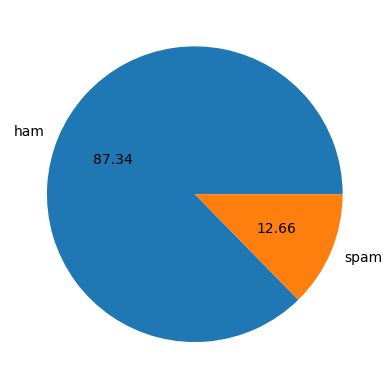

In [149]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [150]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
df['no_of_characters'] = df['text'].apply(len)
df['no_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [152]:
df.head()

,type,text,no_of_characters,no_of_words,no_of_sentences
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3


In [153]:
import seaborn as sb

<AxesSubplot:xlabel='no_of_characters', ylabel='Count'>

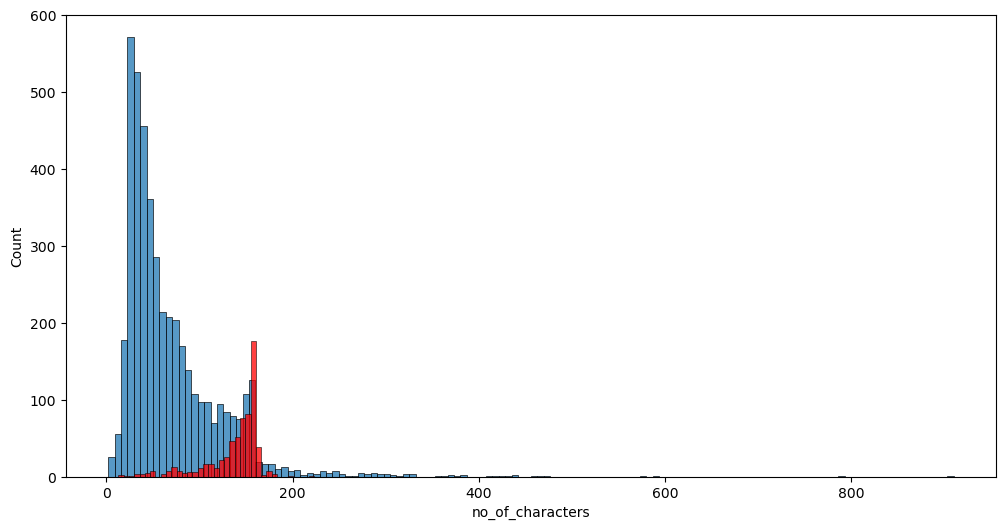

In [154]:
plt.figure(figsize=(12,6))
sb.histplot(df[df['type'] == 0]['no_of_characters'])
sb.histplot(df[df['type'] == 1]['no_of_characters'],color='red')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

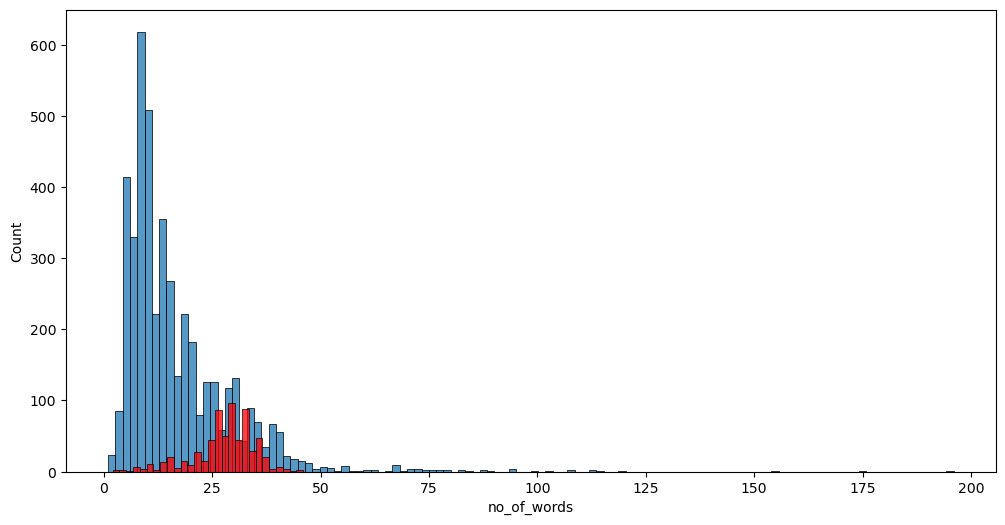

In [155]:
plt.figure(figsize=(12,6))
sb.histplot(df[df['type'] == 0]['no_of_words'])
sb.histplot(df[df['type'] == 1]['no_of_words'],color='red')

<AxesSubplot:xlabel='no_of_sentences', ylabel='Count'>

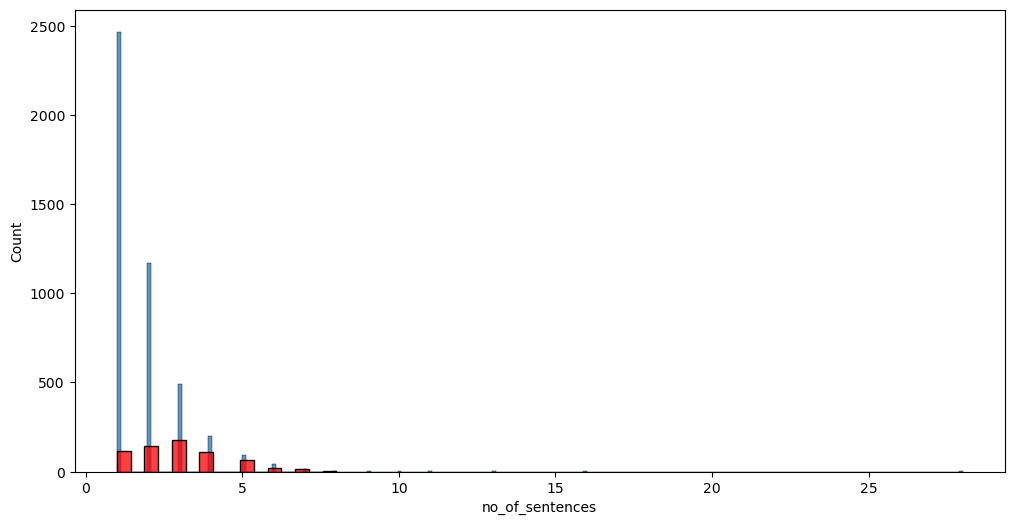

In [156]:
plt.figure(figsize=(12,6))
sb.histplot(df[df['type'] == 0]['no_of_sentences'])
sb.histplot(df[df['type'] == 1]['no_of_sentences'],color='red')

<AxesSubplot:>

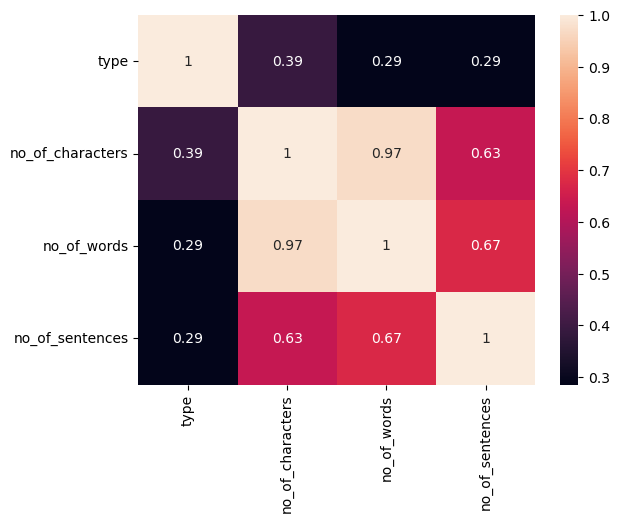

In [157]:
sb.heatmap(df.corr(),annot=True)

In [158]:
#data preprocessing

In [159]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
    text = text.lower() #lowercase
    text = nltk.word_tokenize(text)#tokenize
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #remove special characters
    text = y[:]
    y.clear()
    
    #remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
df['transformed_text'] = df['text'].apply(transform_text)

In [161]:
df.head()

,type,text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [162]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

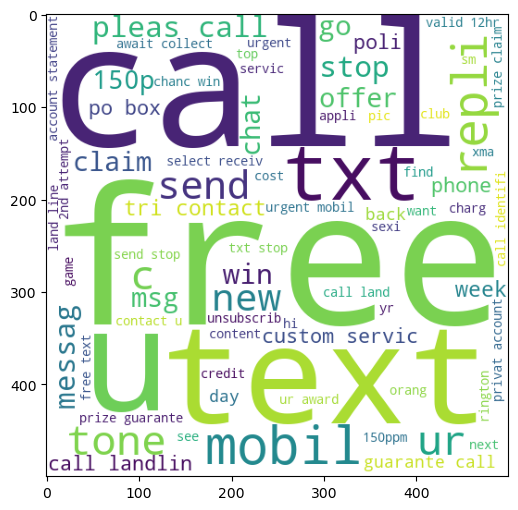

In [163]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

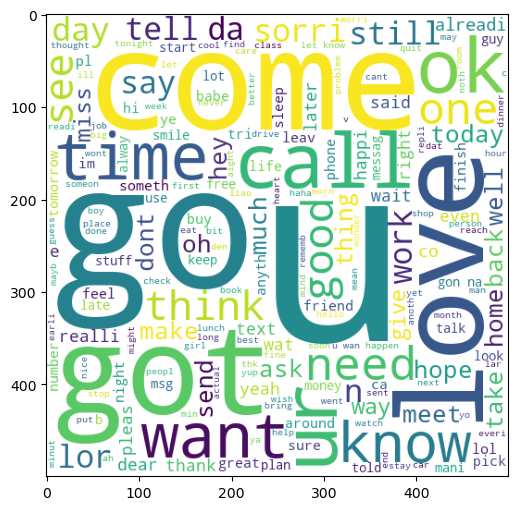

In [164]:
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [165]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [166]:
len(spam_corpus)

9978

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


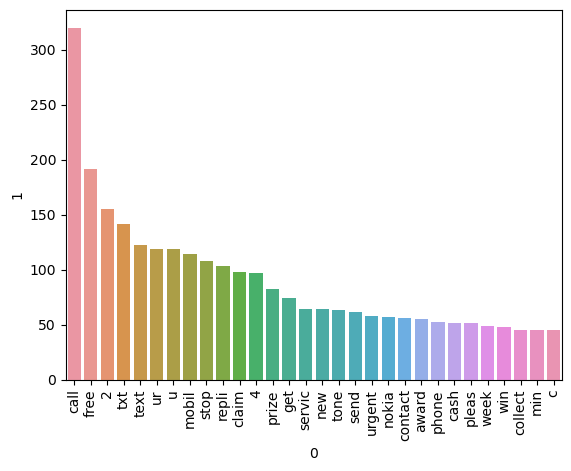

In [167]:
from collections import Counter
sb.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [168]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [169]:
len(ham_corpus)

35082

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


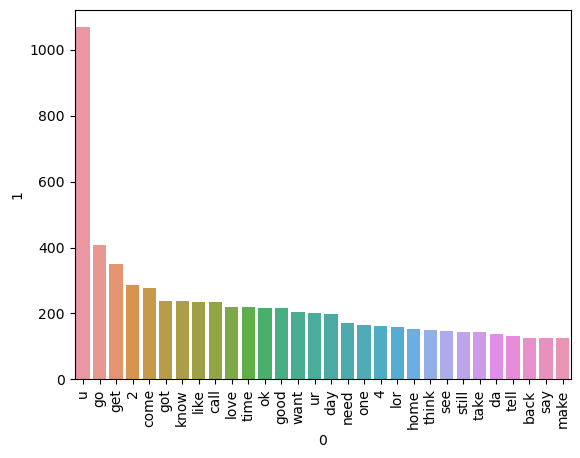

In [170]:
from collections import Counter
sb.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [171]:
#Model Building

In [172]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()

In [173]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [174]:
X.shape

(5156, 6746)

In [175]:
y = df['type'].values

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [178]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [179]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [180]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8507751937984496
[[762 134]
 [ 20 116]]
0.464


In [181]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9563953488372093
[[896   0]
 [ 45  91]]
1.0


In [182]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9670542635658915
[[894   2]
 [ 32 104]]
0.9811320754716981


In [183]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [184]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [185]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [186]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [187]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748062015503876, 0.9824561403508771)

In [188]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748062015503876
Precision -  0.9824561403508771


C:\Users\adity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.8963178294573644
Precision -  1.0
For  NB
Accuracy -  0.9563953488372093
Precision -  1.0
For  DT
Accuracy -  0.9292635658914729
Precision -  0.8315789473684211
For  LR
Accuracy -  0.9476744186046512
Precision -  0.9555555555555556
For  RF
Accuracy -  0.9622093023255814
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680232558139535
Precision -  0.963963963963964
For  BgC
Accuracy -  0.9534883720930233
Precision -  0.8666666666666667
For  ETC
Accuracy -  0.9689922480620154
Precision -  1.0
For  GBDT
Accuracy -  0.9467054263565892
Precision -  0.9090909090909091
For  xgb
Accuracy -  0.9670542635658915
Precision -  0.9396551724137931


In [189]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [190]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896318,1.000000
2,NB,0.956395,1.000000
5,RF,0.962209,1.000000
8,ETC,0.968992,1.000000
0,SVC,0.974806,0.982456
6,AdaBoost,0.968023,0.963964
4,LR,0.947674,0.955556
10,xgb,0.967054,0.939655
9,GBDT,0.946705,0.909091
7,BgC,0.953488,0.866667


In [191]:
#optimizing

In [192]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)

In [193]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [194]:
y = df['type'].values

In [195]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [196]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [197]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [198]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [199]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748062015503876
Precision -  0.9824561403508771
For  KN
Accuracy -  0.9137596899224806
Precision -  0.9795918367346939
For  NB
Accuracy -  0.9757751937984496
Precision -  0.9663865546218487


C:\Users\adity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  DT
Accuracy -  0.9273255813953488
Precision -  0.7850467289719626
For  LR
Accuracy -  0.9563953488372093
Precision -  0.9504950495049505
For  RF
Accuracy -  0.9728682170542635
Precision -  0.990909090909091
For  AdaBoost
Accuracy -  0.9593023255813954
Precision -  0.9272727272727272
For  BgC
Accuracy -  0.9467054263565892
Precision -  0.813953488372093
For  ETC
Accuracy -  0.9748062015503876
Precision -  0.9583333333333334
For  GBDT
Accuracy -  0.9525193798449613
Precision -  0.967741935483871
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.9642857142857143


In [200]:
performance_1000_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_features_1000':accuracy_scores,'Precision_max_features_1000':precision_scores}).sort_values('Precision_max_features_1000',ascending=False)

In [201]:
performance_1000_df

,Algorithm,Accuracy_max_features_1000,Precision_max_features_1000
5,RF,0.972868,0.990909
0,SVC,0.974806,0.982456
1,KN,0.913760,0.979592
9,GBDT,0.952519,0.967742
2,NB,0.975775,0.966387
10,xgb,0.968992,0.964286
8,ETC,0.974806,0.958333
4,LR,0.956395,0.950495
6,AdaBoost,0.959302,0.927273
7,BgC,0.946705,0.813953


In [202]:
final_df=performance_df.merge(performance_1000_df)

In [203]:
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_features_1000,Precision_max_features_1000
0,KN,0.896318,1.000000,0.913760,0.979592
1,NB,0.956395,1.000000,0.975775,0.966387
2,RF,0.962209,1.000000,0.972868,0.990909
3,ETC,0.968992,1.000000,0.974806,0.958333
4,SVC,0.974806,0.982456,0.974806,0.982456
5,AdaBoost,0.968023,0.963964,0.959302,0.927273
6,LR,0.947674,0.955556,0.956395,0.950495
7,xgb,0.967054,0.939655,0.968992,0.964286
8,GBDT,0.946705,0.909091,0.952519,0.967742
9,BgC,0.953488,0.866667,0.946705,0.813953


In [204]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000)

In [205]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [206]:
y = df['type'].values

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [208]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [209]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [210]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [211]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9743589743589743


C:\Users\adity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9118217054263565
Precision -  1.0
For  NB
Accuracy -  0.9748062015503876
Precision -  0.9824561403508771
For  DT
Accuracy -  0.9312015503875969
Precision -  0.7927927927927928
For  LR
Accuracy -  0.9554263565891473
Precision -  0.9591836734693877
For  RF
Accuracy -  0.9718992248062015
Precision -  1.0
For  AdaBoost
Accuracy -  0.9631782945736435
Precision -  0.9375
For  BgC
Accuracy -  0.9554263565891473
Precision -  0.8688524590163934
For  ETC
Accuracy -  0.9748062015503876
Precision -  0.9910714285714286
For  GBDT
Accuracy -  0.9525193798449613
Precision -  0.9887640449438202
For  xgb
Accuracy -  0.9670542635658915
Precision -  0.9722222222222222


In [212]:
performance_2000_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_features_2000':accuracy_scores,'Precision_max_features_2000':precision_scores}).sort_values('Precision_max_features_2000',ascending=False)

In [213]:
performance_2000_df

,Algorithm,Accuracy_max_features_2000,Precision_max_features_2000
1,KN,0.911822,1.000000
5,RF,0.971899,1.000000
8,ETC,0.974806,0.991071
9,GBDT,0.952519,0.988764
2,NB,0.974806,0.982456
0,SVC,0.975775,0.974359
10,xgb,0.967054,0.972222
4,LR,0.955426,0.959184
6,AdaBoost,0.963178,0.937500
7,BgC,0.955426,0.868852


In [214]:
final_df=final_df.merge(performance_2000_df)

In [215]:
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_features_1000,Precision_max_features_1000,Accuracy_max_features_2000,Precision_max_features_2000
0,KN,0.896318,1.000000,0.913760,0.979592,0.911822,1.000000
1,NB,0.956395,1.000000,0.975775,0.966387,0.974806,0.982456
2,RF,0.962209,1.000000,0.972868,0.990909,0.971899,1.000000
3,ETC,0.968992,1.000000,0.974806,0.958333,0.974806,0.991071
4,SVC,0.974806,0.982456,0.974806,0.982456,0.975775,0.974359
5,AdaBoost,0.968023,0.963964,0.959302,0.927273,0.963178,0.937500
6,LR,0.947674,0.955556,0.956395,0.950495,0.955426,0.959184
7,xgb,0.967054,0.939655,0.968992,0.964286,0.967054,0.972222
8,GBDT,0.946705,0.909091,0.952519,0.967742,0.952519,0.988764
9,BgC,0.953488,0.866667,0.946705,0.813953,0.955426,0.868852


In [216]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [217]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [218]:
y = df['type'].values

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [220]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [221]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [222]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [223]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9786821705426356
Precision -  0.9830508474576272


C:\Users\adity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9060077519379846
Precision -  1.0
For  NB
Accuracy -  0.9738372093023255
Precision -  0.9823008849557522
For  DT
Accuracy -  0.9292635658914729
Precision -  0.8181818181818182
For  LR
Accuracy -  0.9505813953488372
Precision -  0.956989247311828
For  RF
Accuracy -  0.9689922480620154
Precision -  1.0
For  AdaBoost
Accuracy -  0.9631782945736435
Precision -  0.9298245614035088
For  BgC
Accuracy -  0.9525193798449613
Precision -  0.859504132231405
For  ETC
Accuracy -  0.9738372093023255
Precision -  0.9823008849557522
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.989010989010989
For  xgb
Accuracy -  0.9670542635658915
Precision -  0.9473684210526315


In [224]:
performance_3000_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_features_3000':accuracy_scores,'Precision_max_features_3000':precision_scores}).sort_values('Precision_max_features_3000',ascending=False)

In [225]:
performance_3000_df

,Algorithm,Accuracy_max_features_3000,Precision_max_features_3000
1,KN,0.906008,1.000000
5,RF,0.968992,1.000000
9,GBDT,0.954457,0.989011
0,SVC,0.978682,0.983051
2,NB,0.973837,0.982301
8,ETC,0.973837,0.982301
4,LR,0.950581,0.956989
10,xgb,0.967054,0.947368
6,AdaBoost,0.963178,0.929825
7,BgC,0.952519,0.859504


In [226]:
final_df=final_df.merge(performance_3000_df)

In [237]:
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_features_1000,Precision_max_features_1000,Accuracy_max_features_2000,Precision_max_features_2000,Accuracy_max_features_3000,Precision_max_features_3000
0,KN,0.896318,1.000000,0.913760,0.979592,0.911822,1.000000,0.906008,1.000000
1,NB,0.956395,1.000000,0.975775,0.966387,0.974806,0.982456,0.973837,0.982301
2,RF,0.962209,1.000000,0.972868,0.990909,0.971899,1.000000,0.968992,1.000000
3,ETC,0.968992,1.000000,0.974806,0.958333,0.974806,0.991071,0.973837,0.982301
4,SVC,0.974806,0.982456,0.974806,0.982456,0.975775,0.974359,0.978682,0.983051
5,AdaBoost,0.968023,0.963964,0.959302,0.927273,0.963178,0.937500,0.963178,0.929825
6,LR,0.947674,0.955556,0.956395,0.950495,0.955426,0.959184,0.950581,0.956989
7,xgb,0.967054,0.939655,0.968992,0.964286,0.967054,0.972222,0.967054,0.947368
8,GBDT,0.946705,0.909091,0.952519,0.967742,0.952519,0.988764,0.954457,0.989011
9,BgC,0.953488,0.866667,0.946705,0.813953,0.955426,0.868852,0.952519,0.859504


In [238]:
final_df.T

,0,1,2,3,4,5,6,7,8,9,10
Algorithm,KN,NB,RF,ETC,SVC,AdaBoost,LR,xgb,GBDT,BgC,DT
Accuracy,0.896318,0.956395,0.962209,0.968992,0.974806,0.968023,0.947674,0.967054,0.946705,0.953488,0.929264
Precision,1.0,1.0,1.0,1.0,0.982456,0.963964,0.955556,0.939655,0.909091,0.866667,0.831579
Accuracy_max_features_1000,0.91376,0.975775,0.972868,0.974806,0.974806,0.959302,0.956395,0.968992,0.952519,0.946705,0.927326
Precision_max_features_1000,0.979592,0.966387,0.990909,0.958333,0.982456,0.927273,0.950495,0.964286,0.967742,0.813953,0.785047
Accuracy_max_features_2000,0.911822,0.974806,0.971899,0.974806,0.975775,0.963178,0.955426,0.967054,0.952519,0.955426,0.931202
Precision_max_features_2000,1.0,0.982456,1.0,0.991071,0.974359,0.9375,0.959184,0.972222,0.988764,0.868852,0.792793
Accuracy_max_features_3000,0.906008,0.973837,0.968992,0.973837,0.978682,0.963178,0.950581,0.967054,0.954457,0.952519,0.929264
Precision_max_features_3000,1.0,0.982301,1.0,0.982301,0.983051,0.929825,0.956989,0.947368,0.989011,0.859504,0.818182


In [228]:
#ensemble
from sklearn.ensemble import StackingClassifier

In [229]:
kn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2,)

estimators=[('kn', kn), ('rfc', rfc)]
final_estimator=RandomForestClassifier()

In [230]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [231]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9728682170542635
Precision 0.9426229508196722


In [232]:
kn = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2,)

estimators=[('kn', kn), ('nb', mnb), ('rfc', rfc)]
final_estimator=RandomForestClassifier()

In [233]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [234]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796511627906976
Precision 0.9457364341085271


In [235]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))